In [2]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

### 1.a)

Registros con y1
520
Registros con y2
480


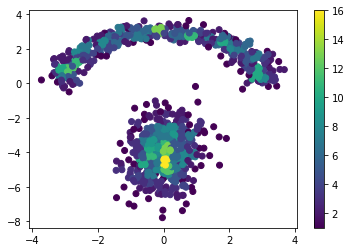

In [18]:
import numpy as np
import matplotlib.pyplot as plt
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)


print("Registros con y1")
print( len(y1) )
print("Registros con y2")
print( len(y2) )


equis=X[:,0]
ii=X[:,1]

hist, xedges, yedges = np.histogram2d(equis, ii,30)
xidx = np.clip(np.digitize(equis, xedges) - 1, 0, hist.shape[0] - 1)
yidx = np.clip(np.digitize(ii, yedges) - 1, 0, hist.shape[1] - 1)
c = hist[xidx, yidx]
plt.scatter(equis, ii, c=c)

plt.colorbar()
plt.show()


In [3]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

### 1.b)

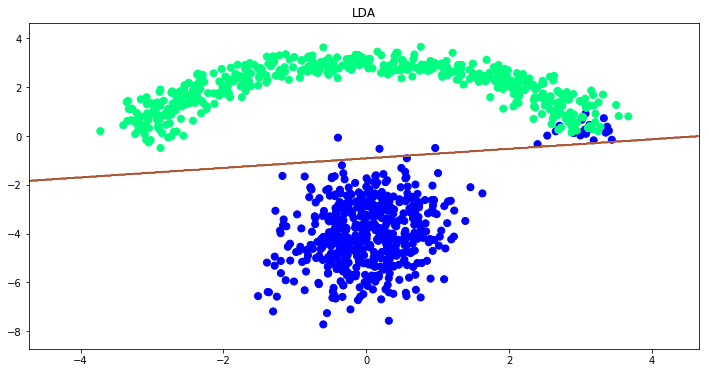

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA.fit(X,y)
visualize_border(model_LDA,X,y,"LDA")

### 1.c)

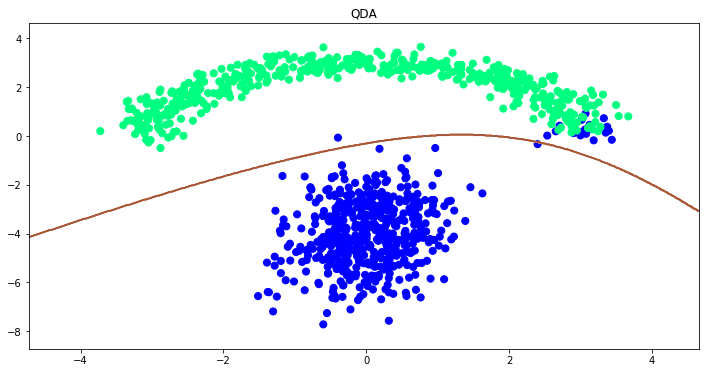

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_QDA = QDA()
model_QDA.fit(X,y)
visualize_border(model_QDA,X,y,"QDA")

### 1.d)

In [6]:
from sklearn.metrics import accuracy_score
y_true = y
y_pred_LDA = model_LDA.predict(X)
y_pred_QDA = model_QDA.predict(X)
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_LDA)))
print("Miss Classification Loss: %f"%(1-accuracy_score(y_true, y_pred_QDA)))

Miss Classification Loss: 0.023000
Miss Classification Loss: 0.020000


In [7]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

### 1.e)

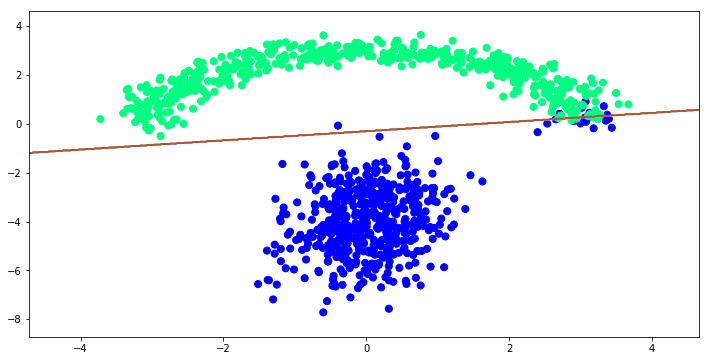

In [8]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

Parametro c en model.set_param

C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

### 1.f)

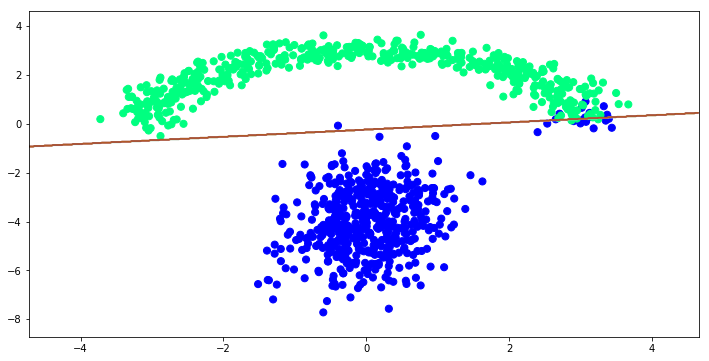

In [9]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.g)

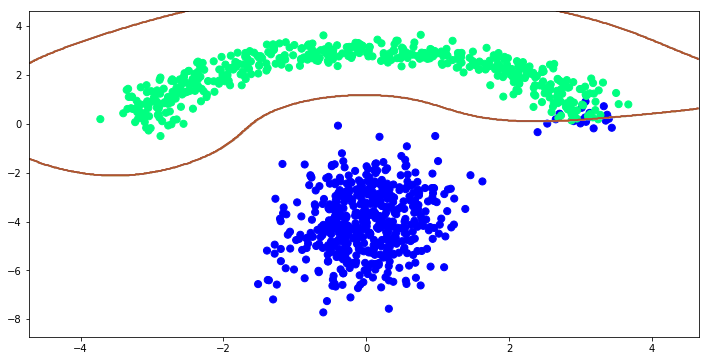

In [10]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

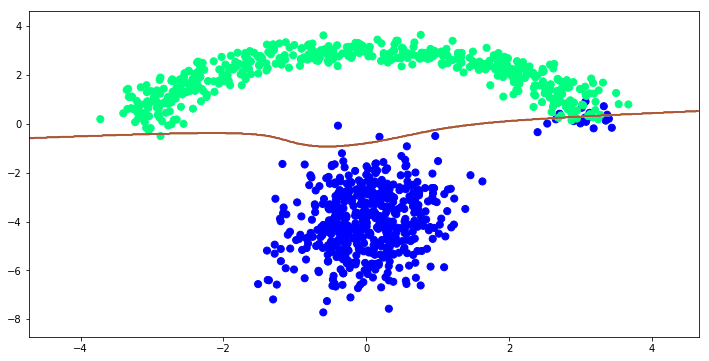

In [11]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly') #try poly
    model.fit(X,y)
    return model
p_min = 0.01 #define your range
p_max = 2 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.h)

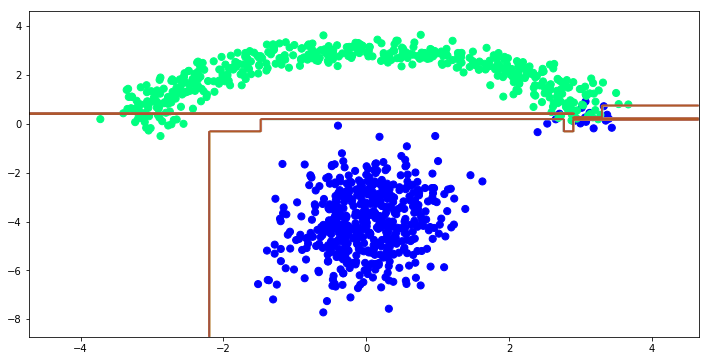

In [12]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

### 1.i)

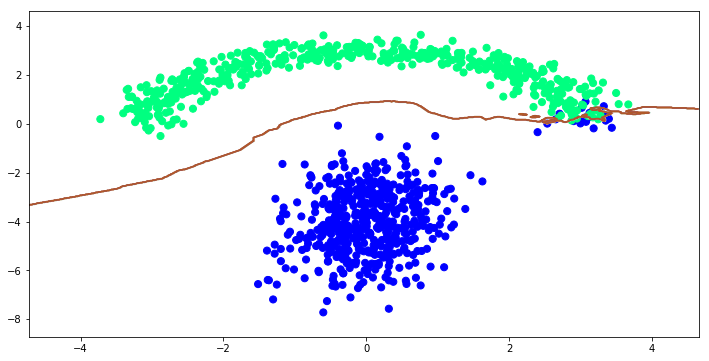

In [13]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model
p_min = 1 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

## 2

In [20]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

### 2.a)

In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

print ("Informacion:")
df.info()
print ("\nNumero de clases:")
print (df['label'].value_counts())
df.head()

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB

Numero de clases:
artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


<p>Se logra apreciar que hay un total de 176 registros para ser analizados. Estos registros poseen la estructura <b>dataset</b> que corresponde a la letra asignada para el dataset (siendo el dataset "A" según lo solicitado), <b>fname</b> que corresponde al nombre de cada archivo de sonido a analizar, <b>label</b> que corresponde a la condición de salud que refleja el audio y <b>sublabel</b> que corresponde a información adicionada que podría existir en el archivo de audio (y que sólo se presenta en el dataset B). Hay 40 registros de la clase <i>artifact</i>, 34 de la clase <i>murmur</i>, 19 de la clase <i>extrahls</i> y hay 31 registros normales. Además, hay 52 registros que no poseen clasificación. 

### 2.b)

In [22]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux

new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='heartbeat-sounds/set_a/') #MODIFICAR EL PATH A LA CARPETA CON LOS AUDIOS
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

new_df.head()

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900


<p>Este paso es importante dado que se debe traducir la información de los archivos de sonido en algún formato con el que se pueda trabajar y así obtener la información necesaria para posteriormente entrenar los módelos. Para esto, tendrán que ser representados en una matriz donde se podrán aplicar las operaciones correspondientes. Es por lo anterior que se debe rellenar con ceros a aquellos archivos que poseen una duración menor e igualar el tamaño de los datos para que no existan elementos vacíos dentro de la matriz.</p>

### 2.c)

In [23]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
            1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
            2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
            0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
new_df['target'].value_counts()

normal/extrahls    66
artifact           58
murmur             52
Name: target, dtype: int64

<p>En estos momentos hay 58 registros de la clase <i>artifact</i>, 52 de la clase <i>murmur</i> y 66 de la clase <i>normal/extrahls</i> (que ahora se encuentran juntas), por lo que ahora todos los registros tienen una clasifación. Al tener etiquetas mal asignadas se altera el entrenamiento del modelo, el cual podría dar predicciones erradas dado que hay distintas concentraciones de datos para ciertas etiquetas en lugar de las esperadas. Un solo dato podría afectar dependiendo del modelo que se decida entrenar, ya que existen algunos que modificarán su curva existiendo un sólo dato alterado. Por otro lado, si la etiqueta que se coloque mal no pertenece al conjunto de posibles clasificaciones, se estaría dando un gran golpe al modelo ya que este podría situar sus margenes erroneamente, separando mal los datos. Esto provocaría incluso que el modelo no pueda predecir.</p>

### 2.d)

In [24]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

new_df['target'].value_counts()

2    66
0    58
1    52
Name: target, dtype: int64

<p>Se aprecia que hay 58 registros de la etiqueta <b>0</b>, 52 de la etiqueta <b>1</b> y 66 de la etiqueta <b>2</b></p>

### 2.e)

In [42]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
print (X)
X.shape

[[  1.00000000e+00  -1.00000000e+00   0.00000000e+00 ...,   1.57770000e+04
    1.50980000e+04   1.30920000e+04]
 [ -4.30000000e+01  -4.70000000e+01  -5.40000000e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.93300000e+03   5.29300000e+03   5.56900000e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  3.76000000e+02   4.13000000e+02   4.29000000e+02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -2.00000000e+01  -3.00000000e+00   6.00000000e+00 ...,   1.97000000e+02
    1.80000000e+02   1.54000000e+02]
 [  7.04000000e+02   7.60000000e+02   7.88000000e+02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


(176, 396900)

### 2.f)

In [41]:
X_fourier = np.abs(np.fft.fft(X))
print (X_fourier)

[[  178117.           547530.62464519  1089559.92330764 ...,
    233192.12529808  1089559.92330764   547530.62464518]
 [  205083.           207594.34125677   249731.48468497 ...,
    263086.58181293   249731.48468497   207594.34125677]
 [ 1065463.           443005.60828815   336340.94408033 ...,
    133880.55699928   336340.94408033   443005.60828815]
 ..., 
 [ 2560689.          1797252.47627466  1779494.39279086 ...,
   2027365.288815    1779494.39279085  1797252.47627454]
 [  549835.          3218604.15040447   937083.3674308  ...,
    248018.11686899   937083.36743077  3218604.15040442]
 [  739686.           393704.52037108   851907.98422727 ...,
   1366322.93343479   851907.98422737   393704.52037104]]


### 2.g)

In [44]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

### 2.h)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,test_size=0.25, random_state=42)

### 2.i)

In [56]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

### 2.j)

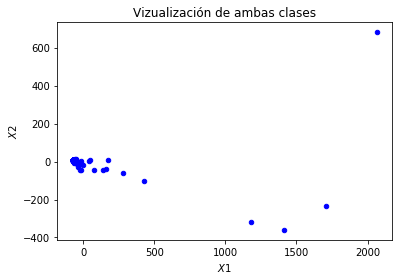

In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

#=======================================#
#plt.figure(figsize = (16, 9))
plt.scatter(X_pca_train[:,0], X_pca_train[:,1], s=20, c = "blue")
#plt.scatter(X_pca_train[:,0][len(y)+1:], X_pca_train[:,1][len(y)+1:], s=50, c = "red")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.title("Vizualización de ambas clases")
plt.show()


## 3

### 3.a)

           tweet_id
count  4.000000e+04
mean   1.845184e+09
std    1.188579e+08
min    1.693956e+09
25%    1.751431e+09
50%    1.855443e+09
75%    1.962781e+09
max    1.966441e+09
(40000, 4)
     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...  


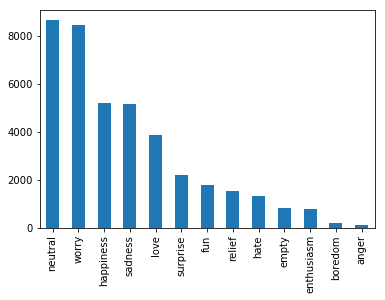

MissxMarisa       23
ChineseLearn      22
MiDesfileNegro    19
erkagarcia        19
lost_dog          18
Name: author, dtype: int64

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('text_emotion.csv')
print(df.describe())
print(df.shape)
print(df.head())

df['sentiment'].value_counts().plot(kind='bar')
plt.show()

df['author'].value_counts().head()

### 3.b)

In [105]:
import numpy as np


msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

print(df_train.shape)


print(df_test.shape)


(31955, 4)
(8045, 4)


### 3.c)

In [106]:
import string
import nltk

pd.options.mode.chained_assignment = None

nltk.download('wordnet')
#nltk.download('stopwords')

def normalizar( df ):

    #definir lemmatizer
    lemmatizer = WordNetLemmatizer()

    ##hay varios algoritmos de stemmer. 
    # http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
    #from nltk.stem.porter import PorterStemmer
    #stemmer = PorterStemmer()

    #descargar y definir stop words
    
    #stop = stopwords.words('english')

    #minusculas
    df['content'] = df['content'].str.lower()     

    #remover puntuacion
    df['content'] = df['content'].str.replace('[^\w\s]',' ')   

    #remove stopwords
    df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))  

    #stemming or lematize
    df['content'] = df['content'].apply(lambda x : filter(None,x.split(" ")))
    df['content'] = df['content'].apply(lambda x : [lemmatizer.lemmatize(y) for y in x]) #lematize
    #df['content'] = df['content'].apply(lambda x : [stemmer.stem(y) for y in x]) #stem
    df['content'] = df['content'].apply(lambda x : " ".join(x))
    return

normalizar(df_train)
df_train.head()

[nltk_data] Downloading package wordnet to /home/nicomero/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,tiffanylue know listenin bad habit earlier sta...
2,1956967696,sadness,coolfunky,funeral ceremony gloomy friday
3,1956967789,enthusiasm,czareaquino,want hang friend soon
5,1956968477,worry,xxxPEACHESxxx,pinging ghostridah14 go prom bc bf like friend
6,1956968487,sadness,ShansBee,sleep im thinking old friend want married damn...
